In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from ripser import Rips
from tqdm import tqdm_notebook

## An example of Persistence B-Spline of toydata

In [2]:
# a circle with its radius 0.4

def cycle(n_sample=1000, noise=0, graph=False):
    r = 0.4
    theta = np.random.uniform(0, 2*np.pi, n_sample)
    x = r * np.cos(theta) + np.random.normal(0, noise, n_sample)
    y = r * np.sin(theta) + np.random.normal(0, noise, n_sample)
    
    if graph:
        plt.scatter(x, y, s=10)
    
    return np.column_stack([x, y])

array([[-0.03078499,  0.42940635],
       [-0.10729951,  0.39203176],
       [ 0.39878547, -0.14568392],
       ...,
       [ 0.13257722,  0.34096098],
       [-0.06648116, -0.39049283],
       [-0.09881318, -0.34571995]])

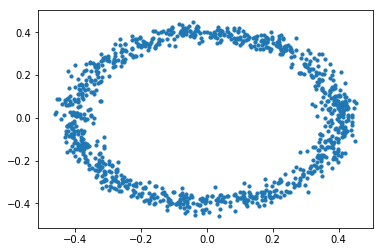

In [3]:
cycle(n_sample=1000, noise=0.025, graph=True)

In [4]:
# two concentric circles with their radii 0.2 and 0.4

def double_cycle1(n_sample=1000, noise=0, graph=False):
    r1 = 0.4
    theta1 = np.random.uniform(0, 2*np.pi, n_sample//2)
    x1 = r1 * np.cos(theta1)
    y1 = r1 * np.sin(theta1)
    
    r2 = 0.2
    theta2 = np.random.uniform(0, 2*np.pi, n_sample//2)
    x2 = r2 * np.cos(theta2)
    y2 = r2 * np.sin(theta2)    
    
    x = np.hstack([x1, x2]) + np.random.normal(0, noise, n_sample)
    y = np.hstack([y1, y2]) + np.random.normal(0, noise, n_sample)
    
    if graph:
        plt.scatter(x, y, s=10)
    
    return np.column_stack([x, y])

array([[ 0.27612822,  0.31072244],
       [ 0.1152856 ,  0.35774854],
       [ 0.1332571 ,  0.35669812],
       ...,
       [ 0.04094771, -0.20949735],
       [-0.17420569,  0.10512087],
       [ 0.21756806,  0.04741862]])

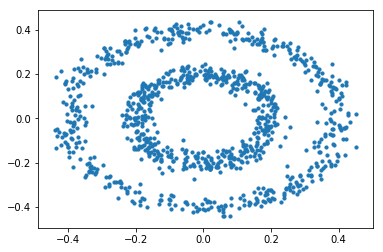

In [5]:
double_cycle1(n_sample=1000, noise=0.025, graph=True)

In [6]:
# two disjoint circles with both their radii 0.2

def double_cycle2(n_sample=1000, noise=0, graph=False):
    r1 = 0.2
    theta1 = np.random.uniform(0, 2*np.pi, n_sample//2)
    x1 = r1 * np.cos(theta1) + 0.25
    y1 = r1 * np.sin(theta1) + 0.25
    
    r2 = 0.2
    theta2 = np.random.uniform(0, 2*np.pi, n_sample//2)
    x2 = r2 * np.cos(theta2) - 0.25
    y2 = r2 * np.sin(theta2) - 0.25
    
    x = np.hstack([x1, x2]) + np.random.normal(0, noise, n_sample)
    y = np.hstack([y1, y2]) + np.random.normal(0, noise, n_sample)
    
    if graph:
        plt.scatter(x, y, s=10)
    
    return np.column_stack([x, y])

array([[ 0.21146128,  0.04148248],
       [ 0.21177837,  0.48522949],
       [ 0.1010476 ,  0.15014946],
       ...,
       [-0.20092071, -0.42023096],
       [-0.17180502, -0.4172273 ],
       [-0.37247853, -0.11873419]])

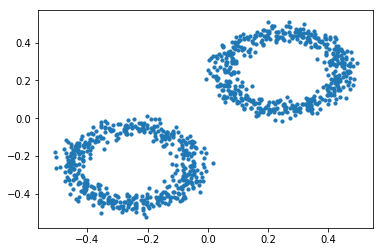

In [7]:
double_cycle2(n_sample=1000, noise=0.025, graph=True)

In [8]:
# a cluster of points sampled at random in the normal square

def rand1(n_sample=1000, noise=0, graph=False):
    result = np.random.uniform(-0.5, 0.5, size=(n_sample, 2)) + np.random.normal(0, noise, (n_sample, 2))
    
    if graph:
        plt.scatter(result[:, 0], result[:, 1], s=10)

    return result

array([[ 0.37529782,  0.33850778],
       [-0.16073787, -0.0801323 ],
       [ 0.04367832, -0.34265542],
       ...,
       [-0.06297611, -0.20481586],
       [-0.09150928, -0.12346675],
       [ 0.06308791,  0.49883004]])

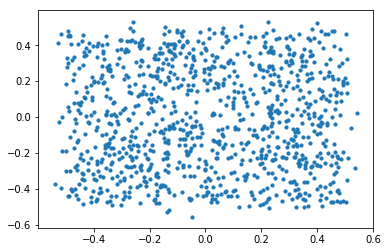

In [9]:
rand1(n_sample=1000, noise=0.025, graph=True)

In [10]:
# two clusters of points sampled at random separately in two squares with edge length 0,5

def rand2(n_sample=1000, noise=0, graph=False):
    result1 = np.random.uniform(-0.5, 0, size=(n_sample//2, 2))
    result2 = np.random.uniform(0, 0.5, size=(n_sample//2, 2))
    result = np.vstack([result1, result2]) +  + np.random.normal(0, noise, (n_sample, 2))
    
    if graph:
        plt.scatter(result[:, 0], result[:, 1], s=10)

    return result

array([[-0.44090789, -0.21128758],
       [-0.11552011, -0.53311166],
       [-0.00897687, -0.07898819],
       ...,
       [-0.010603  ,  0.25839605],
       [ 0.19489334,  0.49725289],
       [ 0.42584028,  0.24015832]])

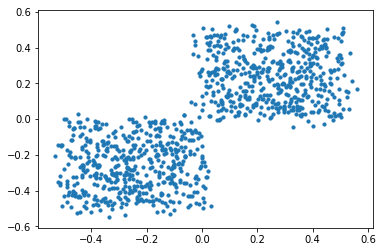

In [11]:
rand2(n_sample=1000, noise=0.025, graph=True)

## Save original data

In [12]:
os.mkdir('origin_data')

for i in range(50):
    result = cycle(noise=0.025)
    np.savetxt('./origin_data/{}_{}.txt'.format(0, i), result, fmt='%s')
    
    result = double_cycle1(noise=0.025)
    np.savetxt('./origin_data/{}_{}.txt'.format(1, i), result, fmt='%s')
    
    result = double_cycle2(noise=0.025)
    np.savetxt('./origin_data/{}_{}.txt'.format(2, i), result, fmt='%s')
    
    result = rand1(noise=0.025)
    np.savetxt('./origin_data/{}_{}.txt'.format(3, i), result, fmt='%s')
    
    result = rand2(noise=0.025)
    np.savetxt('./origin_data/{}_{}.txt'.format(4, i), result, fmt='%s')

## Compute PD and save in 'PD_toydata'

In [13]:
path = './origin_data'
files = sorted(os.listdir(path))

In [14]:
rips = Rips()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, verbose=True)


### Computing PD takes about 15 minutes

In [16]:
os.mkdir('PD_toydata')

for file in tqdm_notebook(files):
    data = np.loadtxt(os.path.join(path, file))
    dgm = rips.fit_transform(data)
    np.savetxt('./PD_toydata/0_' + file, np.array(dgm[0]), fmt='%s')
    np.savetxt('./PD_toydata/1_' + file, np.array(dgm[1]), fmt='%s')

HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

In [17]:
# normalization

import glob
import numpy as np

pd_files = glob.glob('./PD_toydata/*.txt')

pd_files = sorted(pd_files)

# H0 normalization
max_h0 = 0
for i in range(len(pd_files)//2):
    data = np.loadtxt(pd_files[i])[:-1]  # disgarding inf 
    if np.max(data) > max_h0:
        max_h0 = np.max(data)

for i in range(len(pd_files)//2):
    data = np.loadtxt(pd_files[i])[:-1]  # disgarding inf     
    data = data / max_h0
    np.savetxt('./PD_toydata/' + pd_files[i].split('/')[-1], data, fmt='%s')

# H1 normalization
max_h1 = 0
for i in range(len(pd_files)//2):
    data = np.loadtxt(pd_files[len(pd_files)//2 + i])
    data[:, 1] = data[:, 1] - data[:, 0]
    if np.max(data) > max_h1:
        max_h1 = np.max(data)
        
for i in range(len(pd_files)//2):
    data = np.loadtxt(pd_files[len(pd_files)//2 + i]) 
    data[:, 1] = data[:, 1] - data[:, 0]
    data = data / max_h1  # 归一化
    np.savetxt('./PD_toydata/' + pd_files[len(pd_files)//2 + i].split('/')[-1], data, fmt='%s')        